[View in Colaboratory](https://colab.research.google.com/github/emjames/neural-networks/blob/master/classification/Classification_scikit_learn.ipynb)

In [0]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fits estimator to data. """
        # set state of ``self``
        return self
            
    def predict(self, X):
        """Predict response of ``X``. """
        # compute predictions ``pred``
        return pred

In [0]:
class Transformer(Estimator):
    
    def transform(self, X):
        """Transforms the input data. """
        # transform ``X`` to ``X_prime``
        return X_prime

In [0]:
from sklearn.linear_model import LinearRegression
est = LinearRegression(fit_intercept=False)

In [0]:
import numpy as np

# random training data
X = np.random.rand(10, 2)
y = np.random.randint(2, size=10)
est.fit(X, y)
est.coef_   # access coefficients

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True)  # always copy input data (don't modify in-place)
X_centered = scaler.fit(X).transform(X)
scaler.mean_  # mean that will be subtracted upon transform

In [6]:
import pandas as pd

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)

# downsample negative cases -- there are many more negatives than positives
indices = np.where(df.default == 'No')[0]
rng = np.random.RandomState(13)
rng.shuffle(indices)
n_pos = (df.default == 'Yes').sum()
df = df.drop(df.index[indices[n_pos:]])

df.head()

,default,student,balance,income
20,No,No,1095.072735,26464.631389
38,No,No,351.453472,35087.488648
61,No,No,766.234379,46478.294257
78,No,No,728.373251,45131.718265
79,No,No,76.991291,28392.093412


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


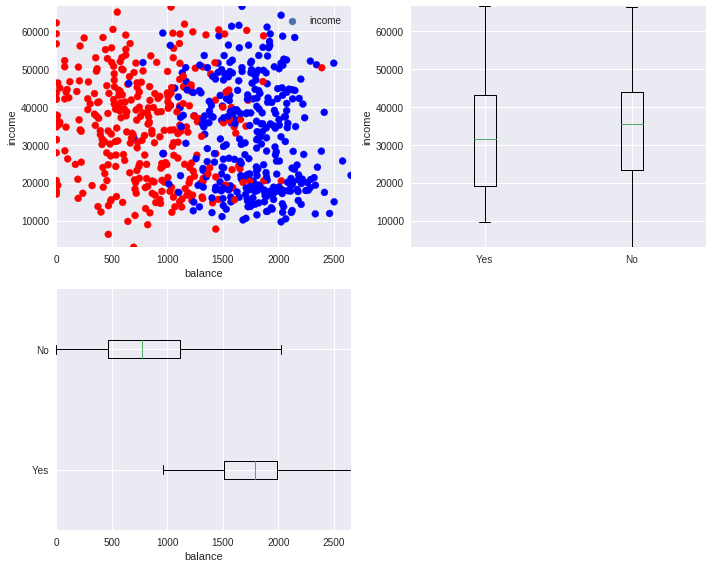

In [7]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%pylab inline

# setup figure
plt.figure(figsize=(10, 8))

# scatter plot of balance (x) and income (y)
ax1 = plt.subplot(221)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax1.scatter(df.balance, df.income, c=(df.default == 'Yes'), cmap=cm_bright)        
ax1.set_xlim((df.balance.min(), df.balance.max()))
ax1.set_ylim((df.income.min(), df.income.max()))
ax1.set_xlabel('balance')
ax1.set_ylabel('income')
ax1.legend(loc='upper right')

# box plots for income
ax2 = plt.subplot(222)
ax2.boxplot([df.income[df.default == 'Yes'], df.income[df.default == 'No']])
ax2.set_ylim((df.income.min(), df.income.max()))
ax2.set_xticklabels(('Yes', 'No'))
ax2.set_ylabel('income')

# box plots for balance
ax3 = plt.subplot(223)
ax3.boxplot([df.balance[df.default == 'Yes'], df.balance[df.default == 'No']], vert=0)
ax3.set_xlim((df.balance.min(), df.balance.max()))
ax3.set_yticklabels(('Yes', 'No'))
ax3.set_xlabel('balance')
plt.tight_layout()

Please run cells in Appendix first


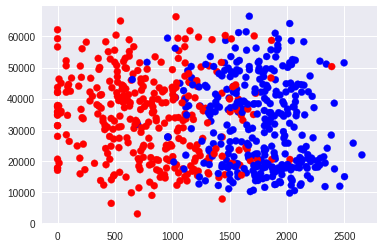

In [8]:
from sklearn.linear_model import LinearRegression

# get feature/predictor matrix as numpy array
X = df[['balance', 'income']].values

# encode class labels
classes, y = np.unique(df.default.values, return_inverse=True)
y = (y * 2) - 1  # map {0, 1} to {-1, 1}

# fit OLS regression 
est = LinearRegression(fit_intercept=True, normalize=True)
est.fit(X, y)

# plot data and decision surface
ax = plt.gca()
ax.scatter(df.balance, df.income, c=(df.default == 'Yes'), cmap=cm_bright)
try:
    plot_surface(est, X[:, 0], X[:, 1], ax=ax)
except NameError:
    print('Please run cells in Appendix first')

In [9]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# the larger operator will return a boolean array which we will cast as integers for fancy indexing
y_pred = (2 * (est.predict(X) > 0.0)) - 1

def confusion_matrix(y_test, y_pred):
    cm = sk_confusion_matrix(y, y_pred)
    cm = pd.DataFrame(data=cm, columns=[-1, 1], index=[-1, 1])
    cm.columns.name = 'Predicted label'
    cm.index.name = 'True label'
    error_rate = (y_pred != y).mean()
    print('error rate: %.2f' % error_rate)
    return cm
    
confusion_matrix(y, y_pred)

error rate: 0.12


Predicted label,-1,1
True label,,
-1,282,51
1,29,304
